In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
X=df.drop('class',axis=1)

In [5]:
X=pd.get_dummies(X,drop_first=True)

In [6]:
y= df['class']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
gb_model=GradientBoostingClassifier()

In [12]:
param_grid={'n_estimators':[50,100],'learning_rate':[0.1,0.05,0.2],'max_depth':[3,4,5]}

In [13]:
grid_model=GridSearchCV(gb_model,param_grid)

In [14]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [15]:
grid_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [16]:
feat=grid_model.best_estimator_.feature_importances_

In [17]:
imp_feat=pd.DataFrame(data=feat,index=X.columns,columns=['Importance'])

In [18]:
imp_feat

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,7.530737e-17
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,1.009843e-16
...,...
habitat_l,0.000000e+00
habitat_m,1.053235e-16
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [19]:
imp_feat=imp_feat[imp_feat['Importance']>0.0005]

In [20]:
imp_feat=imp_feat.sort_values('Importance')

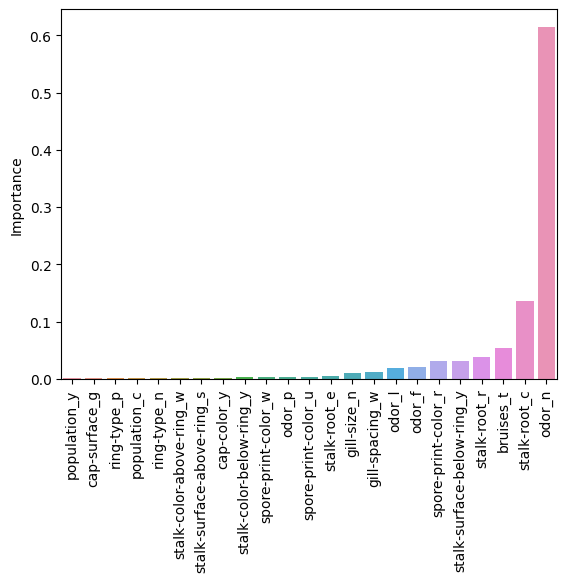

In [21]:
sns.barplot(data=imp_feat,y='Importance',x=imp_feat.index)
plt.xticks(rotation=90);

In [22]:
y_pred=grid_model.predict(X_test)

In [23]:
#  performance metrics 

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



# thanks